In [1]:
import pandas as pd
import seaborn as sns
from ephesus.data import get_data_json
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

2022-06-03 12:34:37.123134: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-03 12:34:37.123158: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = get_data_json()
df.head()

,fichier,translation
0,3e7ffb67-8872-4172-bf18-4fe338ecae3f_64e118fc-...,"Nouvelle ordonnance pour madame Vilain, valabl..."
1,2d035c4b-cdfa-4982-87dc-916fe07a0824_50e8d80a-...,"Prise de sang réalisée au domicile, ce jour, l..."
2,f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_3ab44a1b-...,Prise de sang réalisée le 12 mai puis le 9 jui...
3,a5050600-95ef-43d8-a5fa-a57c791bf843_2af70417-...,"Injection intramusculaire cet après-midi, pas ..."
4,9f980dcf-b431-4e67-876f-2b8e288b7900_777f3b22-...,Test PCR remboursable fait le 8 février à 11h1...


In [3]:
tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/camembert-ner-with-dates")
model = AutoModelForTokenClassification.from_pretrained("Jean-Baptiste/camembert-ner-with-dates")

In [4]:
nlp = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple")

In [5]:
sample_size = sample_size = 30
df_sample = df.sample(sample_size).copy()

df_sample["camembert"] = nlp(df_sample["translation"].to_list())
df_sample.head()

,fichier,translation,camembert
223,978eb126-14a0-46cf-bd27-44b6b77cecb7_2f2e740b-...,Pansement tous les 2 jours pendant 20 jours. D...,"[{'entity_group': 'DATE', 'score': 0.8874701, ..."
3519,9f980dcf-b431-4e67-876f-2b8e288b7900_5e4fa2f1-...,"Monsieur maurice, julien test antigénique le 6...","[{'entity_group': 'PER', 'score': 0.90974444, ..."
2267,a5050600-95ef-43d8-a5fa-a57c791bf843_7c158de8-...,Test antigénique réalisé ce soir au cabinet.,[]
1481,2d035c4b-cdfa-4982-87dc-916fe07a0824_1808a05d-...,Réalisation d'une prise de sang à monsieur por...,"[{'entity_group': 'LOC', 'score': 0.42230144, ..."
2796,2d035c4b-cdfa-4982-87dc-916fe07a0824_0d7a71c6-...,Pansement AMI2 2 fois par semaine le lundi et ...,"[{'entity_group': 'MISC', 'score': 0.9655404, ..."


In [6]:
def keep_date_only(entities_serie):
    return [[entity.get("word") for entity in entities if entity.get("entity_group", "empty") == "DATE"] for entities in entities_serie]

In [7]:
df_sample["date_words"] = keep_date_only(df_sample["camembert"])
df_sample.head()

,fichier,translation,camembert,date_words
223,978eb126-14a0-46cf-bd27-44b6b77cecb7_2f2e740b-...,Pansement tous les 2 jours pendant 20 jours. D...,"[{'entity_group': 'DATE', 'score': 0.8874701, ...","[2 jours pendant 20 jours, le 2 octobre]"
3519,9f980dcf-b431-4e67-876f-2b8e288b7900_5e4fa2f1-...,"Monsieur maurice, julien test antigénique le 6...","[{'entity_group': 'PER', 'score': 0.90974444, ...",[à 13h30.]
2267,a5050600-95ef-43d8-a5fa-a57c791bf843_7c158de8-...,Test antigénique réalisé ce soir au cabinet.,[],[]
1481,2d035c4b-cdfa-4982-87dc-916fe07a0824_1808a05d-...,Réalisation d'une prise de sang à monsieur por...,"[{'entity_group': 'LOC', 'score': 0.42230144, ...",[le 23 01 2021 à 8h30 à]
2796,2d035c4b-cdfa-4982-87dc-916fe07a0824_0d7a71c6-...,Pansement AMI2 2 fois par semaine le lundi et ...,"[{'entity_group': 'MISC', 'score': 0.9655404, ...","[le lundi et le jeudi, le 25 juillet]"


In [8]:
df_sample["date_words_len"] = df_sample["date_words"].map(len)
df_sample.head()

,fichier,translation,camembert,date_words,date_words_len
223,978eb126-14a0-46cf-bd27-44b6b77cecb7_2f2e740b-...,Pansement tous les 2 jours pendant 20 jours. D...,"[{'entity_group': 'DATE', 'score': 0.8874701, ...","[2 jours pendant 20 jours, le 2 octobre]",2
3519,9f980dcf-b431-4e67-876f-2b8e288b7900_5e4fa2f1-...,"Monsieur maurice, julien test antigénique le 6...","[{'entity_group': 'PER', 'score': 0.90974444, ...",[à 13h30.],1
2267,a5050600-95ef-43d8-a5fa-a57c791bf843_7c158de8-...,Test antigénique réalisé ce soir au cabinet.,[],[],0
1481,2d035c4b-cdfa-4982-87dc-916fe07a0824_1808a05d-...,Réalisation d'une prise de sang à monsieur por...,"[{'entity_group': 'LOC', 'score': 0.42230144, ...",[le 23 01 2021 à 8h30 à],1
2796,2d035c4b-cdfa-4982-87dc-916fe07a0824_0d7a71c6-...,Pansement AMI2 2 fois par semaine le lundi et ...,"[{'entity_group': 'MISC', 'score': 0.9655404, ...","[le lundi et le jeudi, le 25 juillet]",2


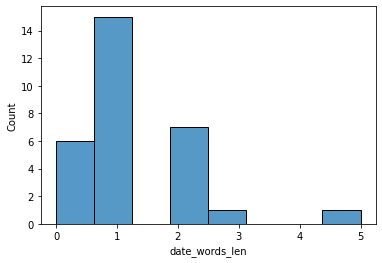

In [9]:
sns.histplot(data=df_sample, x="date_words_len");

In [10]:
df_sample.shape

(30, 5)

## let's see if we're correct when we don't detect any date

On voit qu'on ne détecte pas les "ce jour", "ce matin", "cet apres-midi", etc

In [11]:
mask = df_sample["date_words_len"] == 0
df_zero = df_sample[mask][["translation"]]
for i in range(len(df_zero)):
    print(df_zero.iloc[i].to_list())

['Test antigénique réalisé ce soir au cabinet.']
['Test antigénique réalisé ce matin à domicile.']
["Prise de sang au cabinet, c'est que plus mutuel, pour Sylvie Caillol."]
['Test antigénique réalisé cet après-midi au cabinet.']
['Test antigénique réalisé ce midi à domicile.']
['PCR, PCR réalisé ce jour à domicile, effectuera au tiers temps pour emeline.']


## let's see if we're correct when we detect one date only

On voit que ca fonctionne bien : il n'y avait en effet qu'une date dans le message et on l'a bien detectee

In [12]:
mask = df_sample["date_words_len"] == 1
df_one = df_sample[mask][["translation", "date_words"]]
for i in range(len(df_one)):
    print(df_one.iloc[i].to_list())

["Monsieur maurice, julien test antigénique le 611 2000 vingt-et-un pas de zone au cabinet à 13h30. Pas de prise en charge. Soins payés dans l'intégralité par chèque.", ['à 13h30.']]
["Réalisation d'une prise de sang à monsieur porte et 1000. Prise de sang réalisée le 23 01 2021 à 8h30 à domicile. Patient miley, merci.", ['le 23 01 2021 à 8h30 à']]
['Test-PCR réalisé à domicile le jeudi 3 février à 10h30. ', ['le jeudi 3 février à 10h30.']]
['Sous-cutanée fait que 25 janvier à 11h au domicile, tournee une.', ['25 janvier à 11h']]
['Test antigénique au cabinet le 27 avril à 14h30 par amandine.', ['le 27 avril à 14h30']]
['Prise de sang et test pcr covid-19, effectuez le 15 février, 10h30 à domicile. ', ['le 15 février, 10h30 à']]
['Test PCR réalisé le 11 janvier 2022.', ['le 11 janvier 2022']]
['Prise de sang réalisé le 5 avril 2022 à 6h45 à domicile par aline.', ['le 5 avril 2022 à 6h45 à']]
['Prise de sang et test PCR avec ordonnance à domicile réalisé ce jour à 8h.', ['à 8h']]
['10h.

## let's see if we're correct when we detect exactly two dates

In [13]:
mask = df_sample["date_words_len"] == 2
df_two = df_sample[mask][["translation", "date_words"]]
for i in range(len(df_two)):
    print(df_two.iloc[i].to_list())

['Pansement tous les 2 jours pendant 20 jours. Début le 2 octobre. Merci.', ['2 jours pendant 20 jours', 'le 2 octobre']]
['Pansement AMI2 2 fois par semaine le lundi et le jeudi 10h-10h30. Ablation des fils le 25 juillet, moins de 10 fils au domicile du patient.', ['le lundi et le jeudi', 'le 25 juillet']]
["Prise de sang, prise d'analyse d'urine réalisés au domicile du patient le 19 février à 8h15. Merci de compter un IFK 8-4.", ['le 19 février à 8h15.', '-4']]
['Monsieur manière, sylvain. Test épaissir le 31 2022 par Aubry Sandra à 10h15 au cabinet. Pas de zone. Soit importe, exonéré, car personne vaccinée et présentant des symptômes.', ['le 31 2022', 'à 10h15']]
['Prise de sang réalisée le 14 novembre à domicile à 7h30.', ['le 14 novembre à', 'à 7h30.']]
['Donc prise de sang, effectué le 6 décembre pour monsieur joly, gérard, à domicile vers 8h.', ['le 6 décembre', '8h']]
["Réalisation d'une prise de sang happy axel le 20 4012 1022 à domicile, à 11h. Merci.", ['20 4012 1022 à', 'à 